In [ ]:
import pandas as pd
import numpy as np

In [ ]:
n = np.random.random((3*100))
out = np.argmin(n.reshape((-1,3)), axis=1)

print(n.shape)
print(out.shape)

In [ ]:
df = pd.read_clipboard()

In [ ]:
df

In [ ]:
grouped_dfs = [i[1] for i in df.groupby("Symbols")]

for i in grouped_dfs:
    print(i)
    print(' ')

In [ ]:
from timeit import repeat

In [ ]:
import pandas as pd
import numpy as np

N_samples = int(1e4)
N_nan = N_var = int(0.02 * N_samples)

# Generate random data
data = np.random.rand(N_samples,2) * [30, 360]
data[np.random.choice(N_samples, N_nan), 1] = np.nan
data[np.random.choice(N_samples, N_var), 1] = 990

# Create dataset
df = pd.DataFrame(data, columns=['WindSpeed', 'WindDir'])
df.index = pd.date_range(start='2000-01-01 00:00', periods=N_samples, freq='10min')

In [ ]:
df

In [ ]:
def meandir(x):
    '''
    Parameters
    ----------
    x : pandas.Series
        pandas series to be averaged

    Returns
    -------
    float
        averaged wind direction
    '''

    # Removes the NaN from the recording
    x = x.dropna()

    # If the record is empty, return NaN
    if len(x)==0:
        return np.nan

    # If the record contains variable samples (990) return variable (990)
    elif np.any(x == 990):
        return 990

    # Otherwise sum the vectors and return the angle
    else:
        angle = np.rad2deg(
                           np.arctan2(
                                   np.sum(np.sin(np.deg2rad(x))),
                                   np.sum(np.cos(np.deg2rad(x)))
                                     )
                          )

        #Wrap angles from (-pi,pi) to (0,360)
        return (angle + 360) % 360

In [ ]:
grouped = df.groupby(pd.Grouper(freq='H'))   # Data from 14.30 to 15.29 are rounded to 15.00
aggfuns1 = {'WindSpeed': np.mean, 'WindDir':meandir}
aggfuns2 = {'WindSpeed': np.mean, 'WindDir':np.mean}

res = repeat(stmt='grouped.agg(aggfuns1)', globals=globals(), number=1, repeat=10)
print(f'With custom aggregating function {min(res)*1000:.2f} ms')

res = repeat(stmt='grouped.agg(aggfuns2)', globals=globals(), number=1, repeat=10)
print(f'Without custom aggregating function {min(res)*1000:.2f} ms')

In [ ]:
set([i[1].shape for i in df.dropna().groupby(pd.Grouper(freq='H'))])

In [ ]:
pd.Grouper()

In [ ]:
grouped.agg(aggfuns1)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


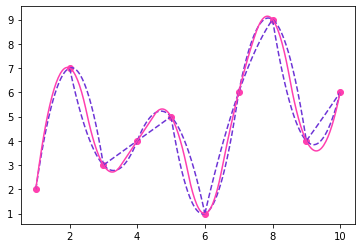

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

# original data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 7, 3, 4, 5, 1, 6, 9, 4, 6]

# quadratic regression
for i in range(int((len(x) + len(y)) / 2)):
    sub_x = x[i:i+3]
    sub_y = y[i:i+3]
    
    model = np.poly1d(np.polyfit(sub_x, sub_y, 2))
    polyline = np.linspace(min(sub_x), max(sub_x), 200)
    plt.plot(polyline, model(polyline), color="#6D34D6", linestyle='dashed')


#Interpolate
x_new = np.linspace(min(x), max(x), 300)  
f = interp1d(x, y, kind='quadratic')

# plot lines
plt.scatter(x, y, color='#FF3FAF')
plt.plot(x_new,f(x_new), color='#FF3FAF', linestyle='solid')
plt.show()

In [ ]:
tf.__version__

In [ ]:
import tensorflow as tf

a = np.random.random((25, 1010, 7, 512))
b = np.random.random((10, 7))

A = tf.convert_to_tensor(a)
B = tf.convert_to_tensor(b)

out = tf.concat([A[:,:10,:,:] + B[None, :, :, None], A[:,10:,:,:]], axis=1)
out.shape

In [ ]:
(A[:,:10,:,:] + B[None, :, :, None]).shape

In [ ]:
tf.stack()

In [ ]:
a[:,:10,:,:] += b[None,:,:,None]

tf.reduce_all(tf.convert_to_tensor(a) == out).

In [ ]:
%%timeit

M, N = 1001, 1001
u = 100
v = 200
sin_img = np.zeros((M, N))
for m in range(M):
    for n in range(N):
        sin_img[m, n] = np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))

In [ ]:
%%timeit

idx_sin_img = np.stack(np.indices((M,N)), axis=-1) #(1001,1001,2)
out = np.sin((2 * np.pi * u * idx_sin_img[...,0] / M) + 
             (2 * np.pi * v * idx_sin_img[...,1] / N))

out.shape

In [ ]:
%%timeit

sin_img = np.array([[np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))
    for n in range(N)]
    for m in range(M)])

In [ ]:
out.shape

In [ ]:
M

In [ ]:
N

In [ ]:
sin_img.shape

In [ ]:
np.sin((2 * np.pi * u * m / M) + (2 * np.pi * v * n / N))

In [ ]:
sin_img = np.zeros((M, N))

In [ ]:
a

In [ ]:
a.strides

In [ ]:
a.shape

In [ ]:
shape = (5,3,6)

In [ ]:
strides = (a.strides[0], a.strides[1]*2, a.strides[1])

In [ ]:
np.lib.stride_tricks.as_strided(a, shape, strides)[0]

In [ ]:
[1,2, 3,4, 2,5],  
[1,2, 2,5, 3,4],  
[3,4, 1,2, 2,5],  
[3,4, 2,5, 1,2],  
[2,5, 1,2, 3,4], and 
[2,5, 3,4, 1,2]

In [ ]:
import numpy as np

a = np.array([[1,2,  3,4,  2,5], 
              [4,5,  6,7,  8,9],
              [2,5,  1,3,  2,5],
              [0,4,  0,4,  0,4],
              [0,3,  1,7,  2,4]])

b = a[:,[4,5,2,3,0,1]]

np.hstack([a,
           np.roll(b, 2, axis=1),
           np.roll(b, 4, axis=1),           
           np.roll(a, 4, axis=1),
           np.roll(a, 2, axis=1),  
           b]).reshape(5,-1,6)

In [ ]:
a

In [ ]:
df = pd.read_clipboard('\s\s+')

In [ ]:
df['properties'].apply(lambda x: [(k,v) for k,v in x.items()])

In [ ]:
list1 = [ "a", 
          "b", 
          "c" ]
list2 = [ "e", 
          "f",
          "g" ]


In [ ]:
try:
    [2 * x  if x > 1 else 0 for x in [1,2,3]]
except SyntaxError:
    print("Why isn't this printed?")

In [ ]:
try:
    eval("[2 * x for x in [1,2,3] if x > 1 else 0]") #<----
except SyntaxError:
    print("Why isn't this printed?")

In [ ]:
import numpy as np

def get_path(Z):
    start = (1,1)
    goal = (-2,-2)
    
    G = np.zeros(Z.shape)
    G_gamma = np.zeros(G.shape)
    G[start] = 1000
    
    break_counter = 0
    longest_possible_path = np.max(Z.shape)*(int(np.min(Z.shape)/2)+1)+(int(np.min(Z.shape)/2)+1)
    
    while G[goal] == 0 and break_counter<longest_possible_path:
        break_counter+=1
        G_gamma = np.subtract(G, 1)
        N = G_gamma[0:-2,1:-1]
        W = G_gamma[1:-1,0:-2]
        C = G[1:-1,1:-1]
        E = G_gamma[1:-1,2:]
        S = G_gamma[2:,1:-1]
        G[1:-1,1:-1] = Z[1:-1,1:-1]*np.maximum.reduce([N,S,E,W,C])
    
    if G[goal] != 0:
        num_steps = int(1000 - G[goal] + 1)
    else:
        num_steps = Z.shape[0]*Z.shape[1]
    return num_steps

def solution(map):
    maze = (np.pad(map, 1, mode='constant', constant_values=1)==0).astype(int)
    best_run = get_path(maze)
    walls = np.argwhere(map)+1

    for i in walls:
        maze[tuple(i)]=1
        p = get_path(maze)
        if p<best_run:
            best_run=p
        maze[tuple(i)]=0
    
    return best_run

In [ ]:
a = np.arange(9)
print([i for i in a])

In [ ]:
a = [[1, 2, 3], 
     [4, 5, 6],
     [7, 8, 9]]

In [ ]:
import numpy as np

d1 = np.diag(np.array(a))
d2 = np.diag(np.flip(np.array(a), axis=1))

print(d1)
print(d2)

In [ ]:
d1 = [a[i][i] for i in range(len(a))]
d2 = [a[i][j] for i,j in enumerate(reversed(range(len(a[0]))))]
print(d1)
print(d2)

In [ ]:
d1 = []
d2 = []

for i,j in enumerate(reversed(range(len(a[0])))):
    d1.append(a[i][i])
    d2.append(a[i][j])
    
print(d1)
print(d2)

In [ ]:
start = 2
stop = 11
factor = 0.1

In [ ]:
range(int(2*10), int(11*10), int(0.1*10))

In [ ]:
float.

In [ ]:
int(0.1*10)

In [ ]:
s = [i for i in range(2,11)]

In [ ]:
s

In [ ]:
listt =[[' 2020-06-12  00:00:00+03:00 ',' 91.5','91.9','91.9','91.9','92.55','92.55','92.1','93.3','93.3 '],
    [' 2020-06-13  00:00:00+03:00 ',' 91.6','91.6','92.85','92.85','92.85','92.85','92.3','92.3','92.1','92.1','94.1',],
    [' 2020-06-14  00:00:00+03:00 ',' 91.5','91.5','91.65','91.65','91.5','92.9','92.9 '],
    [' 2020-06-15  00:00:00+03:00 ',' 91.85','91.85','91.6','91.85','91.85','92.55','92.4','92.4','93.7','93.7','93.35','93.35 '],
    [' 2020-06-16  00:00:00+03:00 ',' 91.6','91.6','91.3','91.3','92.75','92.75','92.15','92.15','93.15','93.15','92.9']]

In [ ]:
set([(i[0],len(i)-2) for i in listt])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

In [ ]:
clf = RandomForestClassifier(n_estimators = 5,max_depth=2, random_state=0, verbose=2)
clf.fit(X, y)

In [ ]:
clf.estimators_[0].

In [ ]:
def fib_rec(n):
    if n == 1:
        return [0]
    elif n == 2:
        return [0,1]
    else:
        x = fib_rec(n-1)
        # the new element the sum of the last two elements
        x.append(sum(x[:-3:-1]))
        return x

    
data = fib_rec(100)

In [ ]:
[i for i in data]

In [ ]:
#Binary classification

from sklearn.metrics import precision_score
import tensorflow as tf

y_true = [0,1,1,1]
y_pred = [1,0,1,1]

print('sklearn precision: ',precision_score(y_true, y_pred, average='binary'))
#Only report results for the class specified by pos_label. 
#This is applicable only if targets (y_{true,pred}) are binary.

m.reset_states()
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print('tf.keras precision:',m.result().numpy())

In [ ]:
#Multi-class classification (global precision)

y_true = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]
y_pred = [[1,0,0],[0,0,1],[0,1,0],[1,0,0],[1,0,0],[0,1,0]]

print('sklearn precision: ',precision_score(y_true, y_pred, average='micro'))
#If None, the scores for each class are returned.

m.reset_states()
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print('tf.keras precision:',m.result().numpy())

In [ ]:
#Multi-class classification (binary precision for each label)

y_true = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]
y_pred = [[1,0,0],[0,0,1],[0,1,0],[1,0,0],[1,0,0],[0,1,0]]

print('sklearn precision: ',precision_score(y_true, y_pred, average=None))
#Calculate metrics globally by counting the total true positives, false negatives and false positives.

#For class 0
m0 = tf.keras.metrics.Precision(class_id=0)
m0.update_state(y_true, y_pred)

#For class 1
m1 = tf.keras.metrics.Precision(class_id=1)
m1.update_state(y_true, y_pred)

#For class 2
m2 = tf.keras.metrics.Precision(class_id=2)
m2.update_state(y_true, y_pred)

mm = [m0.result().numpy(), m1.result().numpy(), m2.result().numpy()]

print('tf.keras precision:',mm)

In [ ]:
#Multi-class classification (Average of individual binary scores)

y_true = [[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1]]
y_pred = [[1,0,0],[0,0,1],[0,1,0],[1,0,0],[1,0,0],[0,1,0]]

print('sklearn precision (Macro): ',precision_score(y_true, y_pred, average='macro'))
print('sklearn precision (Avg of None): ',np.average(precision_score(y_true, y_pred, average=None)))

print(' ')

print('tf.keras precision:',np.average(mm))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_gaps(x):
    #Identifying the size and shape of the repeating pattern
    xpattern = int(x.shape[0]//np.max(x.sum(axis=0))+2)
    ypattern = int(x.shape[1]//np.max(x.sum(axis=1))+2)
    pattern_shape = (xpattern, ypattern)
    
    #Calculating number of rolling windows that exist with that pattern
    num_xpatterns = x.shape[0]//pattern_shape[0]+1
    num_ypatterns = x.shape[1]//pattern_shape[1]+1
    
    #Calculating the stride and shape that needs to be taken with stride_tricks
    shp = (num_xpatterns, num_ypatterns, xpattern, ypattern)  #(2, 2, 3, 5)
    strd = (x.strides[0]*(xpattern-1), x.strides[1]*(ypattern-1), x.strides[0], x.strides[1])  #(144, 32, 72, 8)
    
    #Generating rolling windows/convolutions over the image to separate the patterns.
    convolve_pattern = np.lib.stride_tricks.as_strided(x, shape=shp, strides=strd)
    
    #Assuming at least 1 untouched pattern exists, finding that pure pattern
    pattern_sums = convolve_pattern.sum(axis=(-1,-2))
    idx = np.unravel_index(np.argmax(pattern_sums), pattern_sums.shape)
    truth_pattern = convolve_pattern[idx]
    
    #Identifying the gaps by subtracting the convolved image with the truth pattern
    gaps = convolve_pattern - truth_pattern[None, None, :, :]
    
    #Setting the gaps as -1 directly into the location of memory of the original image
    for i in np.argwhere(gaps==-1):
        convolve_pattern[tuple(i)]=-1
    
    return(x)

In [ ]:
img = np.array([[1., 0., 0., 0., 1., 0., 0., 0., 0.],  #One gap here
                [0., 0., 1., 0., 0., 0., 1., 0., 0.],
                [1., 0., 0., 0., 1., 0., 0., 0., 1.],
                [0., 0., 1., 0., 0., 0., 0., 0., 0.],  #One gap here
                [1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
img = np.array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],  #One gap here
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],  #One gap here
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
                [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]) #Two gaps here

In [ ]:
plt.imshow(img)

In [ ]:
plt.imshow(find_gaps(img))

In [ ]:
np.frompyfunc()

In [ ]:
lst = [["Orange", "Carrot"], ["Green", "Apple"], ["Yellow", "Banana"], ["Orange", "Pumpkin"], ["Green", "Apple"]]

In [ ]:
dict_sum = {'Orange': {'Carrot': 1, 'Pumpkin': 1}, 'Green': {'Apple': 2}, 'Yellow': {'Banana': 1}}

In [ ]:
lst

In [ ]:
dict_sum

In [ ]:
import itertools

In [ ]:
from collections import Counter

In [ ]:
counts = dict(Counter([i for sublist in lst for i in sublist]))

In [ ]:
[(i,counts) for i in lst]

In [ ]:
import pandas as pd

In [ ]:
dataset_train = pd.read_clipboard('\s\s+')

In [ ]:
df

In [ ]:
dataset_train.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaled_training_set

In [ ]:
training_set

In [ ]:
sc = MinMaxScaler()

In [ ]:
sc.fit_transform(training_set)

In [ ]:
X_train[0]

In [ ]:
Y_train[0]

In [ ]:
sc = MinMaxScaler()
training_set = dataset_train.iloc[:,:].values
scaled_training_set = sc.fit_transform(training_set)
time_step = 3
X_train = []
Y_train = []
for i in range(len(training_set)):
    X_train.append(scaled_training_set[i-time_step:i,:])
    Y_train.append(scaled_training_set[i:i+3,3])

    
    
    
    X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],-1))
print(X_train.shape,Y_train.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, TimeDistributed

In [ ]:
Y_train

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=10,return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()
model.fit(X_train,Y_train.reshape(-1,1),epochs=50,batch_size=time_step)

In [ ]:
import numpy as np

In [ ]:
d1 = {'Transect':['A','A','B','B','C','C'],
      'Easting':[100,101,200,201,306,307],
      'Northing':[200,201,200,201,206,207],
      'Elev':[2.0,3.0,6.0,7.0,4.0,6.0],
      'Dist':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]}

d2 = {'Transect':['A','B','C'],
      'Easting':[97,199,298],
      'Northing':[198,198,198],
      'Elev':[0.0,6.5,8.5],
      'Dist':[0,0,0]}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

In [ ]:
#Defining the dataframes
d1 = {'Transect':['A','A','B','B','C','C'],
      'Easting':[100,101,200,201,306,307],
      'Northing':[200,201,200,201,206,207],
      'Elev':[2.0,3.0,6.0,7.0,4.0,6.0],
      'Dist':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]}

d2 = {'Transect':['A','B','C'],
      'Easting':[97,199,298],
      'Northing':[198,198,198],
      'Elev':[0.0,6.5,8.5],
      'Dist':[0,0,0]}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)

#Selecting columns to keep
cols = ['Easting','Northing', 'Elev']

#Creating columns with index = Transect to subtract 
#over this level using Broadcasting
a = df1.set_index('Transect')[cols]
b = df2.set_index('Transect')[cols]

#Formula of distance with elevation
#D=√((Long1-Long2)²+(Lat1-Lat2)²+(Alt1-Alt2)²)
a['Dist'] = (a.subtract(b, level=0)**2).sum(axis=1)**(1/2)

r = pd.concat([a.reset_index(), df2]).sort_values(by = ['Transect', 'Dist'])
print(r)

  Transect  Easting  Northing  Elev       Dist
0        A       97       198   0.0   0.000000
0        A      100       200   2.0   4.123106
1        A      101       201   3.0   5.830952
1        B      199       198   6.5   0.000000
2        B      200       200   6.0   2.291288
3        B      201       201   7.0   3.640055
2        C      298       198   8.5   0.000000
4        C      306       206   4.0  12.175796
5        C      307       207   6.0  12.971122

In [ ]:
d = {'Trans': ['A', 'A','B', 'B'],'X': [0.5, 0.5, 1.5, 1.5], 'Y': [2.5, 4.5, 3.5, 6.5]}
s = {'Trans': ['A', 'B'],'X': [0.5, 1.5],'Y': [0.5, 1.5]}

data= pd.DataFrame(data=d)
start = pd.DataFrame(data=s)
start['Dist'] = 0.0

cols = ['X','Y']
a = data.set_index('Trans')[cols]
b = start.set_index('Trans')[cols]

a['Dist'] = (a.subtract(b, level=0)**2).sum(axis=1)**(1/2)

r = pd.concat([a.reset_index(), start]).sort_values(by = ['Trans', 'Dist'])
print(r)

In [ ]:
import matplotlib.pyplot as plt
from skimage.data import camera
from skimage.transform import rescale, pyramid_gaussian, pyramid_expand, pyramid_reduce
from scipy.ndimage import zoom

In [ ]:
from skimage.data import camera
img = camera()
print(img.shape)

In [ ]:
def plotit(img, up, down):
    fig, axes = plt.subplots(1,3, figsize=(10,15))
    axes[0].imshow(img)
    axes[1].imshow(up)
    axes[2].imshow(down)
    axes[0].title.set_text('Original')
    axes[1].title.set_text('Upsample')
    axes[2].title.set_text('Downsample')

In [ ]:
%%timeit
#from scipy.ndimage import zoom

up = zoom(img,2)
down = zoom(up,0.5)

#161 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [ ]:
(163/1000)/(471/1000000000)

In [ ]:
plotit(img, up, down)

In [ ]:
%%timeit
up = zoom(img,2, order=0)
down = zoom(up,0.5, order=0)

In [ ]:
plotit(img, up, down)

In [ ]:
%%timeit
up = pyramid_expand(img,2)
down = pyramid_reduce(up,2)

In [ ]:
plotit(img, up, down)

In [ ]:
%%timeit
up = pyramid_gaussian(img,2)
down = pyramid_gaussian(up,0.5)

In [ ]:
plotit(img, up, down)

In [ ]:
%%timeit
up = rescale(img,2, anti_aliasing=False)
down = rescale(up,0.5, anti_aliasing=False)

In [ ]:
plotit(img, up, down)

In [ ]:
%%timeit
#from PIL import Image
im = Image.fromarray(img)
up = im.resize((im.width*2, im.height*2),resample=Image.LANCZOS)
down = up.resize((up.width//2, up.height//2),resample=Image.LANCZOS)

In [ ]:
plotit(img, up, down)

In [ ]:
X = np.random.random((100,3,1))
y = np.random.randint(0,29,(100,))

In [ ]:
from tensorflow.keras import layers, Model, utils


#Dummy data and its shapes
X = np.random.random((100,3,1)) #(100,3,1)
y = np.random.randint(0,29,(100,)) #(100,)


#Design model
inp = layers.Input((3,1))
x = layers.LSTM(64, return_sequences=True)(inp)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(30, activation='softmax')(x)
model = Model(inp, out)

#Compile and fit
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(X, y, batch_size=32,epochs=3)

In [ ]:
utils.plot_model(model, show_layer_names=False, show_shapes=True)

In [ ]:
model.summary()

In [ ]:
a

In [ ]:
import pandas as pd

In [ ]:
#Creating dataframe with same columns
d = {'Trans': ['A', 'A','B', 'B'],'X': [0.5, 0.5, 1.5, 1.5], 'Y': [2.5, 4.5, 3.5, 6.5], 'Elev':[3,4,2,5]}
s = {'Trans': ['A', 'B'],'X': [0.5, 1.5],'Y': [0.5, 1.5],'Elev':[4,3]}

data = pd.DataFrame(data=d)
start = pd.DataFrame(data=s)
start['Dist'] = 0.0  #Adding Dist column to s

#getting X, Y and setting index to "Trans"
cols = ['X','Y', 'Elev']
a = data.set_index('Trans')[cols]
b = start.set_index('Trans')[cols]

#Calculating broadcasted distance (by index)
a['Dist'] = (a.subtract(b, level=0)**2).sum(axis=1)**(1/2)

#Stacking start points and calculated points and sorting 
r = pd.concat([a.reset_index(), start]).sort_values(by = ['Trans', 'Dist'])
print(r)

In [ ]:
data = pd.read_clipboard('\s\s+')
data

In [ ]:
start = pd.read_clipboard('\s\s+')
start

In [ ]:
((a.subtract(b, level=0)**2).sum(axis=1)**(1/2)).shape

In [ ]:
start['Dist'] = 0.0  #Adding Dist column to s

#getting X, Y and setting index to "Trans"
cols = ['X','Y', 'Elev']
a = data.set_index('Trans')[cols]
b = start.set_index('Trans')[cols]
b = b.loc[a.index.unique()]  #<--- to ensure that same trans elements exist in both

#Calculating broadcasted distance (by index)
a['Dist'] = list((a.subtract(b, level=0)**2).sum(axis=1)**(1/2))

#Stacking start points and calculated points and sorting 
r = pd.concat([a.reset_index(), start]).sort_values(by = ['Trans', 'Dist'])
print(r)

In [ ]:
(a.subtract(b, level=0)**2).sum(axis=1)**(1/2)

In [ ]:
a['Dist'] = (a.subtract(b, level=0)**2).sum(axis=1)**(1/2)

In [ ]:
from PIL import Image

In [ ]:
im = Image.open('/Users/akshay/Desktop/83145032_10151205469524971_2032796849986863104_n.png')

In [ ]:
new = im.width*2, im.height*2

In [ ]:
new_im = im.resize(new, resample=Image.LANCZOS)

In [ ]:
new_im.save('/Users/akshay/Desktop/upscale.png')

In [ ]:
ne

In [ ]:
dic3 =  {'1': [A1,A2,A4,A6], '2': [A3,A7] ,'3': [A5] }

In [ ]:
dic1 = {'1': 'india','2': 'america','3': 'china'}
dic2 = {'A1':'india','A2':'india' ,'A3':'america','A4':'india' ,'A5': 'china','A6': 'india','A7': 'america' }

In [ ]:
re_dic1 = {v:k for k,v in dic1.items()}
re_dic1

In [ ]:
from collections import defaultdict

In [ ]:
arr_A=np.arange(17, 29)
arr_B=np.arange(17, 27)

In [ ]:
rep_A=np.array([4,4,2,1,1])
rep_B=np.array([1,4,5])

In [ ]:
def fetch_sublists(arr, rep):
    itr = iter(arr)
    for size in rep:
        sublist = []
        for _ in range(size):
            sublist.append(next(itr))
        yield sublist

In [ ]:
print(list(fetch_sublists(arr_A, rep_A)))
print(list(fetch_sublists(arr_B, rep_B)))

[[17, 18, 19, 20], [21, 22, 23, 24], [25, 26], [27], [28]]
[[17], [18, 19, 20, 21], [22, 23, 24, 25, 26]]

In [ ]:
arr_A=np.arange(17, 29)
arr_A

In [ ]:
np.abs(rep_A-np.max(rep_A))

In [ ]:
np.arange(0,rep_A.shape[0]*np.max(rep_A)).reshape(rep_A.shape[0],np.max(rep_A))

In [ ]:
z = np.zeros((np.max(rep_A),rep_A.shape[0]))
z

In [ ]:
z[slice(0,4),0]=1

In [ ]:
np.sum(np.eye(4)[:,:2], axis=1)

In [ ]:
np.arange()

In [ ]:
arr_A

In [ ]:
def f(n):
    q = []
    n = np.insert(np.cumsum(rep_A), 0, 0)
    for i in range(1, n.shape[0]):
        q.append(np.any(np.eye(arr_A.shape[0], dtype=bool)[n[i-1]:n[i]], axis=0))
    return np.vstack(q) #np.flipud(np.vstack(q).T)

In [ ]:
arrf(rep_A)

In [ ]:
def fetch_sublists(arr, rep):
    itr = iter(arr)
    maxlen = np.max(rep)
    for size in rep:
        sublist = []
        for _ in range(size):
            sublist.append(next(itr))
        yield np.pad(sublist, maxlen-size)[:maxlen]
        
def get_stars(arr, rep, orientation='right'):
    if orientation=='right':
        m = np.flipud(list(fetch_sublists(arr, rep)))
        star_elements = m[(m!=0).argmax(0), np.arange(m.shape[1])]
        m = np.rot90(m,k=-1)
    else:
        m = np.array(list(fetch_sublists(arr, rep)))
        star_elements = np.flip(m[(m!=0).argmax(0), np.arange(m.shape[1])])
        m = m.T
    return m, star_elements



a,b = get_stars(arr_A, rep_A, 'right')
print(a)
print(b)

In [ ]:
mat, star = get_stars(arr_A, rep_A, 'right')

print('Matrix -')
print(mat)
print('')
print('Star elements -')
print(star)

Matrix -
[[17 21  0  0  0]
 [18 22  0  0  0]
 [19 23 25  0  0]
 [20 24 26 27 28]]

Star elements -
[21 22 25 28]

In [ ]:
list(fetch_sublists(arr_A, rep_A))

In [ ]:
(m!=0).argmax(0)

In [ ]:
(m!=0).argmax(axis=0)

In [ ]:
m.shape

In [ ]:
m[:,np.argmax(m, axis=0)]

In [ ]:
np.apply_over_axes(f, rep_A)

In [ ]:
from scipy.spatial.distance import squareform
from sklearn.cluster import DBSCAN
import numpy as np
import gzip

fd = gzip.GzipFile('distance_vector.npy.gz', "r")
matrix = squareform(np.load(fd))
fd.close()
clusters = DBSCAN(eps=0.05, min_samples=1, metric="precomputed").fit(np.abs(1-matrix))
labels = clusters.labels_
print("Groups: ", set(labels))

In [ ]:
fd = gzip.GzipFile('distance_vector.npy.gz', "r")
np.load(fd).shape

In [ ]:
fd = gzip.GzipFile('distance_vector.npy.gz', "r")
matrix = squareform(np.load(fd))

In [ ]:
np.max(matrix)

In [ ]:
unique_clusters = []
for i in range(1,100):
    clusters = DBSCAN(eps=i/1000, min_samples=15, metric="precomputed").fit(np.abs())
    labels = clusters.labels_
    unique_clusters.append(len(set(labels)))
        
plt.plot(unique_clusters)

In [ ]:
portnames = ["PAN", "AMS", "CAS", "NYC", "HEL"]

In [ ]:
import itertools

In [ ]:
import numpy as np

In [ ]:
x = np.array(portnames)

In [ ]:
list(itertools.product([1,2,3,4], repeat=5))

In [ ]:
def main():
    portnames = ["PAN", "AMS", "CAS", "NYC", "HEL"]

    # don't change this bit - provided in exercise
    port1 = 0
    for port2 in range(1, 5):
        for port3 in range(1, 5):
            for port4 in range(1, 5):
                for port5 in range(1, 5):
                    route = [port1, port2, port3, port4, port5]

                    # instructions to add if statement that checks that the route includes all of the ports
                    # if "PAN" in route and "AMS" in route and "CAS" in route and "NYC" in route and "HEL" in route:
                    if set(route).issubset(set(portnames)):
                    
                        # do not modify the print statement
                        print(' '.join([portnames[i] for i in route]))

                    else:
                        continue

main()

In [ ]:
portnames = ["PAN", "AMS", "CAS", "NYC", "HEL"]

# don't change this bit - provided in exercise
port1 = 0
for port2 in range(1, 5):
    for port3 in range(1, 5):
        for port4 in range(1, 5):
            for port5 in range(1, 5):
                route = [port1, port2, port3, port4, port5]

                # instructions to add if statement that checks that the route includes all of the ports
                # if "PAN" in route and "AMS" in route and "CAS" in route and "NYC" in route and "HEL" in route:
                if set(range(len(portnames))).issubset(route):

                    # do not modify the print statement
                    print(' '.join([portnames[i] for i in route]))

                else:
                    continue

In [ ]:
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Reshape
x_train = x_train.reshape(60000,784)
x_train = x_train / 255.0
x_test = x_test.reshape(10000,784)
x_test = x_test / 255.0

print('Data shapes->',[i.shape for i in [x_train, y_train, x_test, y_test]])

#Contruct computation graph
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

#Compile with loss as cross_entropy and optimizer as adam
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Fit model
model.fit(x_train, y_train, epochs=10, batch_size=1000)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras import layers, Model, utils

#Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Reshape
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test / 255.0

#Set y to onehot instead of label encoded
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

#print([i.shape for i in [x_train, y_train, x_test, y_test]])

#Contruct computation graph
inp = layers.Input((28,28,1))
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inp)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Flatten()(x)
out = Dense(10, activation='softmax')(x)

#Define model
model = Model(inp, out)

#Compile with loss as cross_entropy and optimizer as adam
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

#Fit model
#model.fit(x_train, y_train, epochs=10, batch_size=1000)

In [ ]:
utils.plot_model(model, show_layer_names=False, show_shapes=True)

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= {'A': [1, 2, 3, 4, 5],
                        'test': None})


d = {'a' : {
        'arg'     : df['A'] == 2,
        't_value' : 'Value Found',
        'f_value' : df['test']
        },
     'b' : {
        'arg'     : df['A'] > 3,
        't_value' : 'Value Found',
        'f_value' : df['test']
        }
     }

for item in d:
    df['test'] = np.where(d[item]['arg'], d[item]['t_value'], d[item]['f_value'])
    
print(df)

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= {'A': [1, 2, 3, 4, 5],
                        'test': None})

#conditions
a = df['A']==2 
b = df['A']>3


df['test'] = df['test'].where(~(a|b), 'Value Found')

print(df)

In [ ]:
df['test'].where(~((df['A']==2) | (df['A']>3)), 'Value Found')

In [ ]:
np.where()

In [ ]:
for item in d:
    df['test'] = np.where(d[item]['arg'], d[item]['t_value'], d[item]['f_value'])

In [ ]:
df

In [ ]:
s = 'hithere'

In [ ]:
next_character = [i[1] for i in zip(s, s[1:])]

print(next_character)


#['i', 'v', 'e', 'm', 'e', 't', 'h', 'e', 'n', 'e', 'x', 't', 'c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r']

In [ ]:
for i in zip(s, s[1:]):
    print(i[1])